# BANA 4090 - Final Project (Group 14)

#### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
%matplotlib inline

from statsmodels.tsa.api import SimpleExpSmoothing
from pmdarima import auto_arima

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from rich.table import Table

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versions Used

!python --version

print("pandas Version:", pd.__version__)
print("Numpy Version:", np.__version__)
print("----------------------------------------------------------------------------")

print('matplotlib:')
!pip3 list | findstr matplotlib
print("----------------------------------------------------------------------------")

print('statsmodels:')
!pip3 list | findstr statsmodels
print("----------------------------------------------------------------------------")

print('pmdarima:')
!pip3 list | findstr pmdarima

print("----------------------------------------------------------------------------")

print('tensorflow:')
!pip3 list | findstr tensorflow
print("----------------------------------------------------------------------------")

print('scikit-learn:')
!pip3 list | findstr scikit-learn
print("----------------------------------------------------------------------------")

print('rich:')
!pip3 list | findstr rich
print("----------------------------------------------------------------------------")

Python 3.11.10pandas Version: 2.2.2
Numpy Version: 1.26.4
----------------------------------------------------------------------------
matplotlib:

matplotlib                   3.9.2
matplotlib-inline            0.1.6
----------------------------------------------------------------------------
statsmodels:
statsmodels                  0.14.2
----------------------------------------------------------------------------
pmdarima:
pmdarima                     2.0.4
----------------------------------------------------------------------------
tensorflow:
tensorflow                   2.18.0
tensorflow_intel             2.18.0
tensorflow-io-gcs-filesystem 0.31.0
----------------------------------------------------------------------------
scikit-learn:
scikit-learn                 1.5.1
----------------------------------------------------------------------------
rich:
rich                         13.9.4----------------------------------------------------------------------------



#### 2. Load Dataset

In [3]:
df = pd.read_csv("Power_Consumption.csv")

#### 3. Exploratory Data Analysis

##### a. Data Dimensions

In [4]:
df.shape

(1461, 7)

##### b. Data Types

In [5]:
df.dtypes

Dates                            object
Whole_House_Consumption         float64
Volts                           float64
Amps                            float64
Kitchen_Consumption             float64
Laundry_Consumption             float64
HVAC_WaterHeater_Consumption    float64
dtype: object

##### c. Summary Statistics

In [6]:
df.describe()

,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
count,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000,1441.000000
mean,1363.276891,240.895906,4.592644,118.389313,426.052047,842.058987
std,646.190719,2.120401,1.682401,98.892979,180.376172,337.799733
min,6.000000,231.000000,1.000000,0.000000,0.000000,0.000000
25%,935.000000,240.000000,4.000000,29.000000,301.000000,543.000000
50%,1345.000000,241.000000,5.000000,111.000000,406.000000,1016.000000
75%,1751.000000,242.000000,6.000000,170.000000,518.000000,1127.000000
max,3984.000000,247.000000,12.000000,594.000000,1440.000000,1377.000000


##### d. Peek at Start & End

In [7]:
df.head(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
0,1/1/2007,2721.0,240.0,8.0,0.0,271.0,338.0
1,1/2/2007,1560.0,240.0,5.0,116.0,297.0,754.0
2,1/3/2007,113.0,241.0,1.0,0.0,241.0,114.0
3,1/4/2007,2675.0,240.0,8.0,315.0,612.0,1113.0
4,1/5/2007,1477.0,235.0,5.0,258.0,499.0,518.0


In [8]:
df.tail(5)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
1456,12/27/2010,2562.0,243.0,6.0,316.0,243.0,1176.0
1457,12/28/2010,2163.0,244.0,6.0,219.0,374.0,1226.0
1458,12/29/2010,2188.0,243.0,6.0,56.0,267.0,1132.0
1459,12/30/2010,2567.0,241.0,7.0,311.0,430.0,1169.0
1460,12/31/2010,3320.0,241.0,6.0,0.0,305.0,1300.0


#### 4. Data Pre-Processing & Wrangling

##### a. Check for Missing Values

In [9]:
df.isna().sum()

Dates                            0
Whole_House_Consumption         20
Volts                           20
Amps                            20
Kitchen_Consumption             20
Laundry_Consumption             20
HVAC_WaterHeater_Consumption    20
dtype: int64

##### b. Fill or Remove Missing Values as Needed

In [10]:
# Fill Forward
df.ffill(inplace = True)

In [11]:
# Verify Missing Values are Filled
df.isna().sum()

Dates                           0
Whole_House_Consumption         0
Volts                           0
Amps                            0
Kitchen_Consumption             0
Laundry_Consumption             0
HVAC_WaterHeater_Consumption    0
dtype: int64

##### c. Convert Date to Index/DateTime

In [12]:
df['Dates'] = pd.to_datetime(df.Dates)

##### d. Plot Daily Whole House Consumptions and Record your Observations

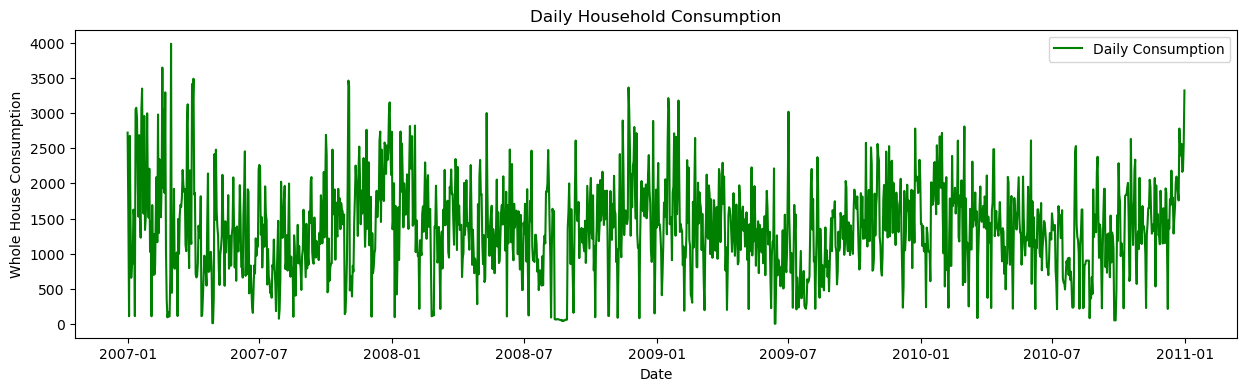

In [13]:
# Plot Daily Household Consumption
plt.figure(figsize=(15, 4))
plt.xlabel('Date')
plt.ylabel('Whole House Consumption')
plt.title('Daily Household Consumption')
plt.plot(df['Dates'], df['Whole_House_Consumption'], label='Daily Consumption', color='Green')
plt.legend()
plt.show();

###### <b><font color="blue">Observations:</font></b> *The data shows fluctuations in household consumption over the years 2007 to 2010, with no clear increasing or decreasing trend. One pattern we find is the peaks and troughs that indicate a tendency for consumption to be higher during the winter months, and lower during the summer months. It also appears that this data is highly variable, with daily values ranging from 0 to nearly 4000 units of consumption.*

##### e. Plot Whole House Consumption by Month/Year and Record your Observations

In [14]:
# Group by Month/Year, Sum Other Columns
monthly_grouped = df.groupby(pd.Grouper(key = 'Dates', freq = 'M')).sum()

# Format the Index to Show Dates as Month/Year
monthly_grouped.index = monthly_grouped.index.strftime('%m/%Y')

monthly_grouped.head(5)

,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
Dates,,,,,,
01/2007,58501.0,7443.0,184.0,4891.0,11337.0,18617.0
02/2007,40231.0,6716.0,134.0,2474.0,11943.0,13441.0
03/2007,48230.0,7439.0,161.0,4240.0,13605.0,16183.0
04/2007,31540.0,7148.0,127.0,2956.0,11911.0,11332.0
05/2007,40188.0,7337.0,140.0,4783.0,13805.0,13900.0


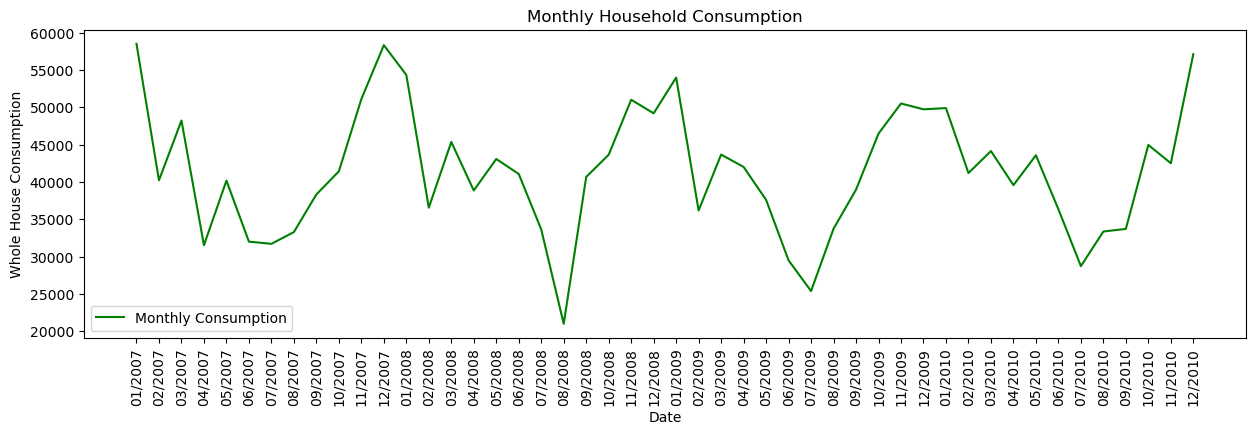

In [15]:
# Plot Monthly Household Consumption
plt.figure(figsize = (15, 4))
plt.xlabel('Date')
plt.ylabel('Whole House Consumption')
plt.title('Monthly Household Consumption')
plt.plot(monthly_grouped.index, monthly_grouped['Whole_House_Consumption'], label = 'Monthly Consumption', color = 'Green')

# Rotate x-axis Labels
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show();

###### <b><font color="blue">Observations:</font></b> *This graph further cements the trend outlined by the previous one. This line plot clearly shows that more energy is consumed in the winter months as all peaks tend to happen in the months of October-January*

##### f. Plot Whole House Consumption by Year and Record your Observations

In [16]:
# Group by Year, Sum Other Columns
yearly_grouped = df.groupby(pd.Grouper(key = 'Dates', freq = 'Y')).sum()

# Format the Index to Show Dates as Month/Year
yearly_grouped.index = yearly_grouped.index.strftime('%Y')

yearly_grouped.head(5)

,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption
Dates,,,,,,
2007,504920.0,87366.0,1722.0,44358.0,154300.0,175139.0
2008,498500.0,88062.0,1670.0,41822.0,141894.0,309107.0
2009,487842.0,88296.0,1659.0,44899.0,152973.0,352712.0
2010,495200.0,88230.0,1649.0,41378.0,173140.0,393531.0


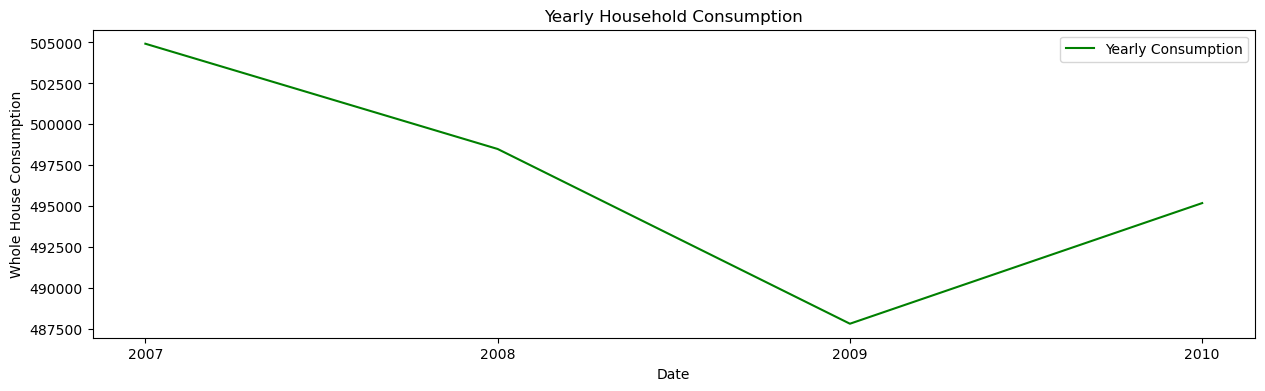

In [17]:
# Plot Yearly Household Consumption
plt.figure(figsize = (15, 4))
plt.xlabel('Date')
plt.ylabel('Whole House Consumption')
plt.title('Yearly Household Consumption')
plt.plot(yearly_grouped.index, yearly_grouped['Whole_House_Consumption'], label = 'Yearly Consumption', color = 'Green')
plt.legend()
plt.show();

###### <b><font color="blue">Observations:</font></b> *The graph displays the yearly whole-house electricity consumption from 2007 to 2010, showing a decline in usage from 2007 to 2009, with consumption reaching its lowest point in 2009. This decrease may be attributed to factors such as energy efficiency improvements, behavioral changes, or external influences like economic conditions. In 2010, there is a notable rebound in consumption, which could reflect increased energy demand, economic recovery, or weather-related factors. The overall variation in yearly consumption is modest, ranging from 487,842 kWh in 2009 to around 504,920 kWh in 2007.*

##### f. Reshape Data to Analyze Time Series Through Plotting Day, Per Weekday, Month, and Year

In [18]:
# Make Another Copy of the DataFrame
df_Analysis = df

# Add Columns for Year, Month, and Day of the Week
df_Analysis['year'] = df_Analysis.Dates.dt.year
df_Analysis['month'] = df_Analysis.Dates.dt.month
df_Analysis['day'] = df_Analysis.Dates.dt.day

# Peek at New DataFrame
df_Analysis.head(10)

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption,year,month,day
0,2007-01-01,2721.0,240.0,8.0,0.0,271.0,338.0,2007,1,1
1,2007-01-02,1560.0,240.0,5.0,116.0,297.0,754.0,2007,1,2
2,2007-01-03,113.0,241.0,1.0,0.0,241.0,114.0,2007,1,3
3,2007-01-04,2675.0,240.0,8.0,315.0,612.0,1113.0,2007,1,4
4,2007-01-05,1477.0,235.0,5.0,258.0,499.0,518.0,2007,1,5
5,2007-01-06,659.0,235.0,3.0,0.0,372.0,460.0,2007,1,6
6,2007-01-07,866.0,240.0,3.0,105.0,621.0,275.0,2007,1,7
7,2007-01-08,857.0,235.0,3.0,145.0,0.0,593.0,2007,1,8
8,2007-01-09,1627.0,239.0,5.0,163.0,446.0,560.0,2007,1,9
9,2007-01-10,1530.0,239.0,5.0,169.0,694.0,349.0,2007,1,10


In [19]:
# Get Weekdays
df_Analysis['weekday'] = df_Analysis['Dates'].apply(lambda x: x.weekday())

In [20]:
# Switch Day Numbers to Names
df_Analysis['weekday#'] = df_Analysis['weekday']
df_Analysis['weekday'].replace(0, '01 - Monday', inplace = True)
df_Analysis['weekday'].replace(1, '02 - Tuesday', inplace = True)
df_Analysis['weekday'].replace(2, '03 - Wednesday', inplace = True)
df_Analysis['weekday'].replace(3, '04 - Thursday', inplace = True)
df_Analysis['weekday'].replace(4, '05 - Friday', inplace = True)
df_Analysis['weekday'].replace(5, '06 - Saturday', inplace = True)
df_Analysis['weekday'].replace(6, '07 - Sunday', inplace = True)

# Peek at dataframe
df_Analysis.head()

,Dates,Whole_House_Consumption,Volts,Amps,Kitchen_Consumption,Laundry_Consumption,HVAC_WaterHeater_Consumption,year,month,day,weekday,weekday#
0,2007-01-01,2721.0,240.0,8.0,0.0,271.0,338.0,2007,1,1,01 - Monday,0
1,2007-01-02,1560.0,240.0,5.0,116.0,297.0,754.0,2007,1,2,02 - Tuesday,1
2,2007-01-03,113.0,241.0,1.0,0.0,241.0,114.0,2007,1,3,03 - Wednesday,2
3,2007-01-04,2675.0,240.0,8.0,315.0,612.0,1113.0,2007,1,4,04 - Thursday,3
4,2007-01-05,1477.0,235.0,5.0,258.0,499.0,518.0,2007,1,5,05 - Friday,4


##### h. Plot Whole House Consumption per Weekday and Record your Observations

In [21]:
# Get Whole House Consumption by Weekday
df_day = df_Analysis[['weekday', 'Whole_House_Consumption']].groupby(['weekday'])['Whole_House_Consumption'].mean().reset_index()

df_day.head(7)

,weekday,Whole_House_Consumption
0,01 - Monday,1268.349282
1,02 - Tuesday,1352.258373
2,03 - Wednesday,1345.688995
3,04 - Thursday,1261.885167
4,05 - Friday,1338.483254
5,06 - Saturday,1486.634615
6,07 - Sunday,1465.427885


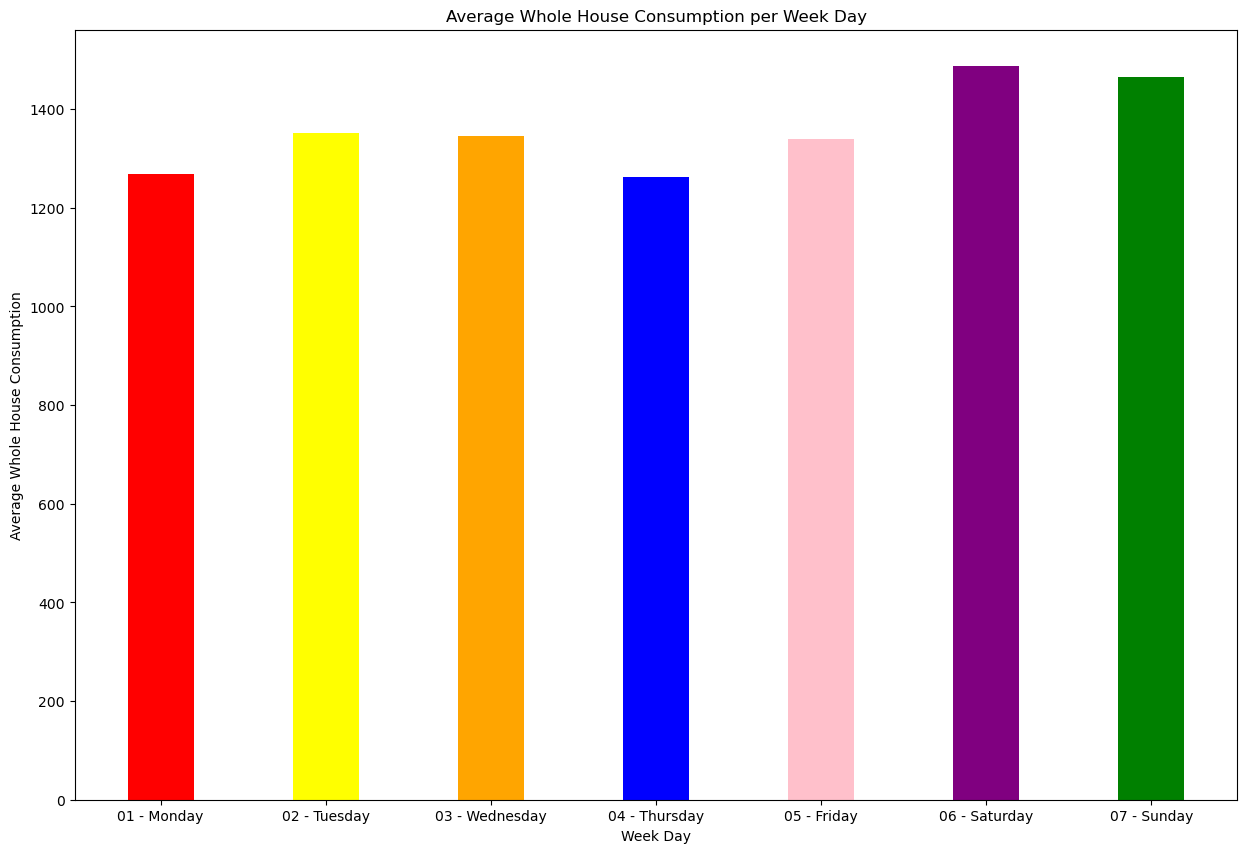

In [22]:
# Plot Average Consumptions per week day
fig = plt.figure(figsize = (15, 10))
colors = ['Red', 'Yellow', 'Orange', 'Blue', 'Pink', 'Purple', 'Green']

# creating the bar plot
plt.bar(df_day['weekday'], df_day['Whole_House_Consumption'], color=colors, width=0.4)
plt.xlabel("Week Day")
plt.ylabel("Average Whole House Consumption")
plt.title("Average Whole House Consumption per Week Day")
plt.show()

###### <b><font color="blue">Observations:</font></b> *The bar chart illustrates the average whole-house electricity consumption for each day of the week, showing relatively steady usage from Monday to Thursday, likely due to reduced daytime activity when residents are away for work or other activities. Energy consumption begins to rise on Friday, reaching its highest levels on Saturday, followed closely by Sunday. This trend indicates increased energy demand over the weekend, likely driven by greater household activity when residents are typically at home.*

##### i. Plot Whole House Consumption per Month and Record your Observations

In [23]:
# Get Whole House Consumption per Month
df_month = df_Analysis[['month', 'Whole_House_Consumption']].groupby(['month'])['Whole_House_Consumption'].mean().reset_index()

df_month.head(12)

,month,Whole_House_Consumption
0,1,1747.782258
1,2,1364.495575
2,3,1463.024194
3,4,1266.725000
4,5,1326.306452
5,6,1157.991667
6,7,963.806452
7,8,979.177419
8,9,1264.316667
9,10,1423.580645


In [24]:
# Change Months from Numeric to Full Name
df_month['month'] = pd.to_datetime(df_month['month'], format = '%m').dt.month_name()

df_month.head(12)

,month,Whole_House_Consumption
0,January,1747.782258
1,February,1364.495575
2,March,1463.024194
3,April,1266.725000
4,May,1326.306452
5,June,1157.991667
6,July,963.806452
7,August,979.177419
8,September,1264.316667
9,October,1423.580645


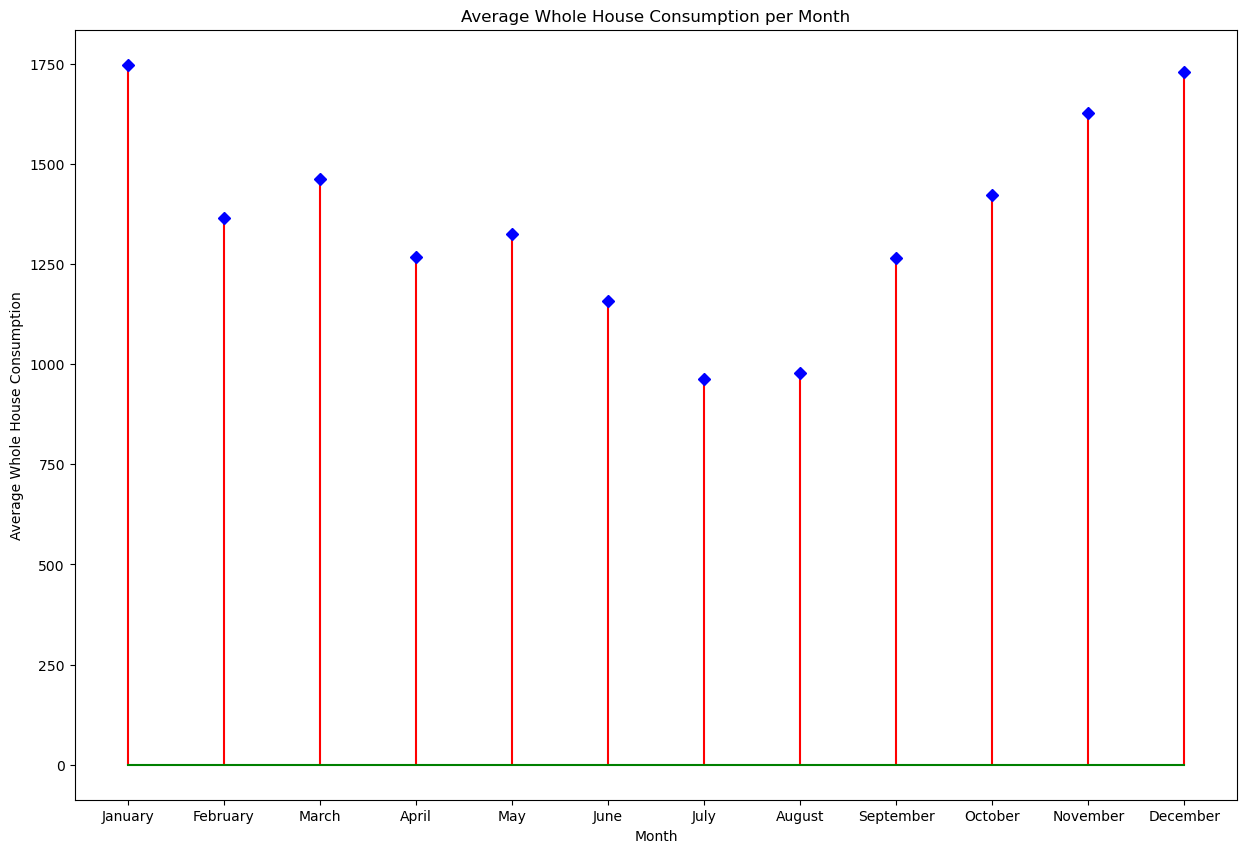

In [25]:
# Plot Average Whole House Consumption per Month
fig = plt.figure(figsize = (15, 10))

# Creating Stem Plot
plt.stem(df_month['month'], df_month['Whole_House_Consumption'], linefmt = 'r-', markerfmt = 'bD', basefmt = 'g-')
plt.xlabel("Month")
plt.ylabel("Average Whole House Consumption")
plt.title("Average Whole House Consumption per Month")
plt.show();

###### <b><font color="blue">Observations:</font></b> *Energy consumption shows a clear seasonal pattern, with peaks in winter months like January due to heating demands and dips in summer months like July, likely from reduced heating needs and increased daylight. January has the highest average consumption, while summer months have the lowest, suggesting opportunities for energy efficiency improvements in heating and solar energy utilization during lower-demand periods.*

##### j. Plot Whole House Consumption per Year and Record your Observations

In [26]:
# Get Whole House Consumption by Weekday
df_year = df_Analysis[['year', 'Whole_House_Consumption']].groupby(['year'])['Whole_House_Consumption'].mean().reset_index()

df_year.head()

,year,Whole_House_Consumption
0,2007,1383.342466
1,2008,1362.021858
2,2009,1336.553425
3,2010,1356.712329


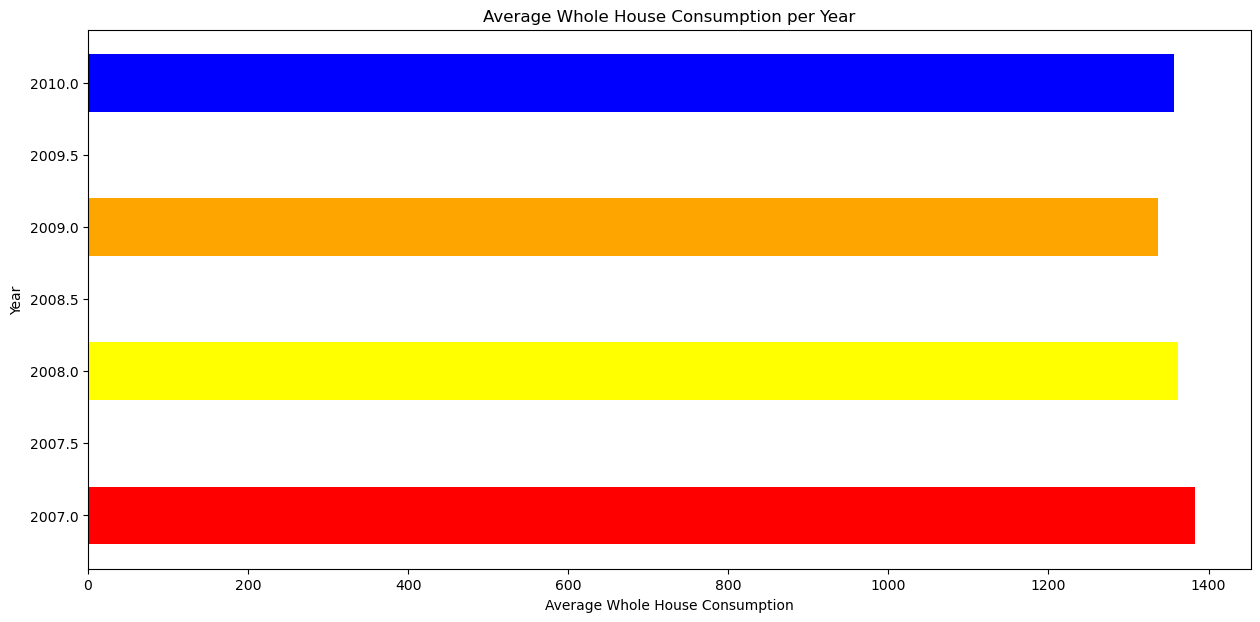

In [27]:
# Plot Average Whole House Consumption per month
fig = plt.figure(figsize = (15, 7))

# creating stem plot
colors = ['Red', 'Yellow', 'Orange', 'Blue', 'Pink', 'Purple', 'Green']

# creating the horizontal bar plot
plt.barh(df_year['year'], df_year['Whole_House_Consumption'], 0.4, color = colors)
plt.xlabel("Average Whole House Consumption")
plt.ylabel("Year")
plt.title("Average Whole House Consumption per Year")
plt.show();

###### <b><font color="blue">Observations:</font></b> *The Average Whole House Consumption per Year" chart reveals relatively stable energy consumption from 2007 to 2010, with minor fluctuations. Energy usage peaked in 2007, followed by gradual declines in 2008 and 2009, possibly due to increased energy efficiency or economic factors like the 2008 financial crisis. A slight recovery is observed in 2010, though it remains below 2007 levels. The overall stability suggests consistent household energy behavior, potentially influenced by weather patterns or incremental adoption of energy-efficient appliances. Missing values in the dataset, forward-filled during preprocessing, might have marginally affected the averages. Further analysis of seasonal and category-specific consumption patterns could provide deeper insights into the factors driving these yearly trends.*

#### 5. Scale and Split Data Into Training and Test Sets to Prepare for Modeling

##### a. Standardize Whole House Consumption Using MinMax Scaler

In [28]:
# Normalize the Data
scaler = MinMaxScaler(feature_range = (0, 1))

data_scaled = scaler.fit_transform(df[['Whole_House_Consumption']])

##### b. Create a Subset Consisting of Dates and the Scaled Consumption

In [29]:
# Add the Scaled Whole House Consumption to Dataframe
df['Scaled_Consumption'] = data_scaled

# Subset the Whole Dataframe - Dates and Scaled_Consumption
df_Scaled = df[['Dates', 'Scaled_Consumption']]

# Make Dates as index
#df_Scaled.set_index('Dates')
df_Scaled.set_index('Dates', inplace = True)

df_Scaled.head(5)

,Scaled_Consumption
Dates,
2007-01-01,0.682504
2007-01-02,0.390649
2007-01-03,0.026898
2007-01-04,0.670940
2007-01-05,0.369784


##### c. Split Data, Check Shape, Peek at Sets

In [30]:
# Split Data
train_set, test_set = np.split(df_Scaled, [int(.8 * len(df_Scaled))])

In [31]:
# Check Training Shape
train_set.shape

(1168, 1)

In [32]:
# Peek at Training (Head)
train_set.head()

,Scaled_Consumption
Dates,
2007-01-01,0.682504
2007-01-02,0.390649
2007-01-03,0.026898
2007-01-04,0.670940
2007-01-05,0.369784


In [33]:
# Check Test Shape
test_set.shape

(293, 1)

In [34]:
# Peek at Test (Tail)
test_set.tail()

,Scaled_Consumption
Dates,
2010-12-27,0.642534
2010-12-28,0.542232
2010-12-29,0.548517
2010-12-30,0.643791
2010-12-31,0.833082


#### 6. Create 3 Time Series Models to Forecast Future Whole House Consumption

In [35]:
# Create list to hold all forecasting accuracy results

# Mean Squared Error
mse_values = []

# Mean Absolute Error
mae_values = []

# Root Mean Squared Error
rmse_values = []

##### a. Exponential Smoothing

In [37]:
# Train model
exp_smoothing_model = SimpleExpSmoothing(train_set)
exp_smoothing_result = exp_smoothing_model.fit(smoothing_level = 0.5, optimized = True)

# Summary of the model
print(exp_smoothing_result.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:     Scaled_Consumption   No. Observations:                 1168
Model:             SimpleExpSmoothing   SSE                             28.309
Optimized:                      False   AIC                          -4340.791
Trend:                           None   BIC                          -4330.664
Seasonal:                        None   AICC                         -4340.756
Seasonal Periods:                None   Date:                 Tue, 10 Dec 2024
Box-Cox:                        False   Time:                         12:00:39
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5000000                alpha                False
initial_level              0.6825038                

In [38]:
# Forecasting using Exponential smoothing model with test set
exp_smoothing_forecast = exp_smoothing_result.forecast(steps = len(test_set))

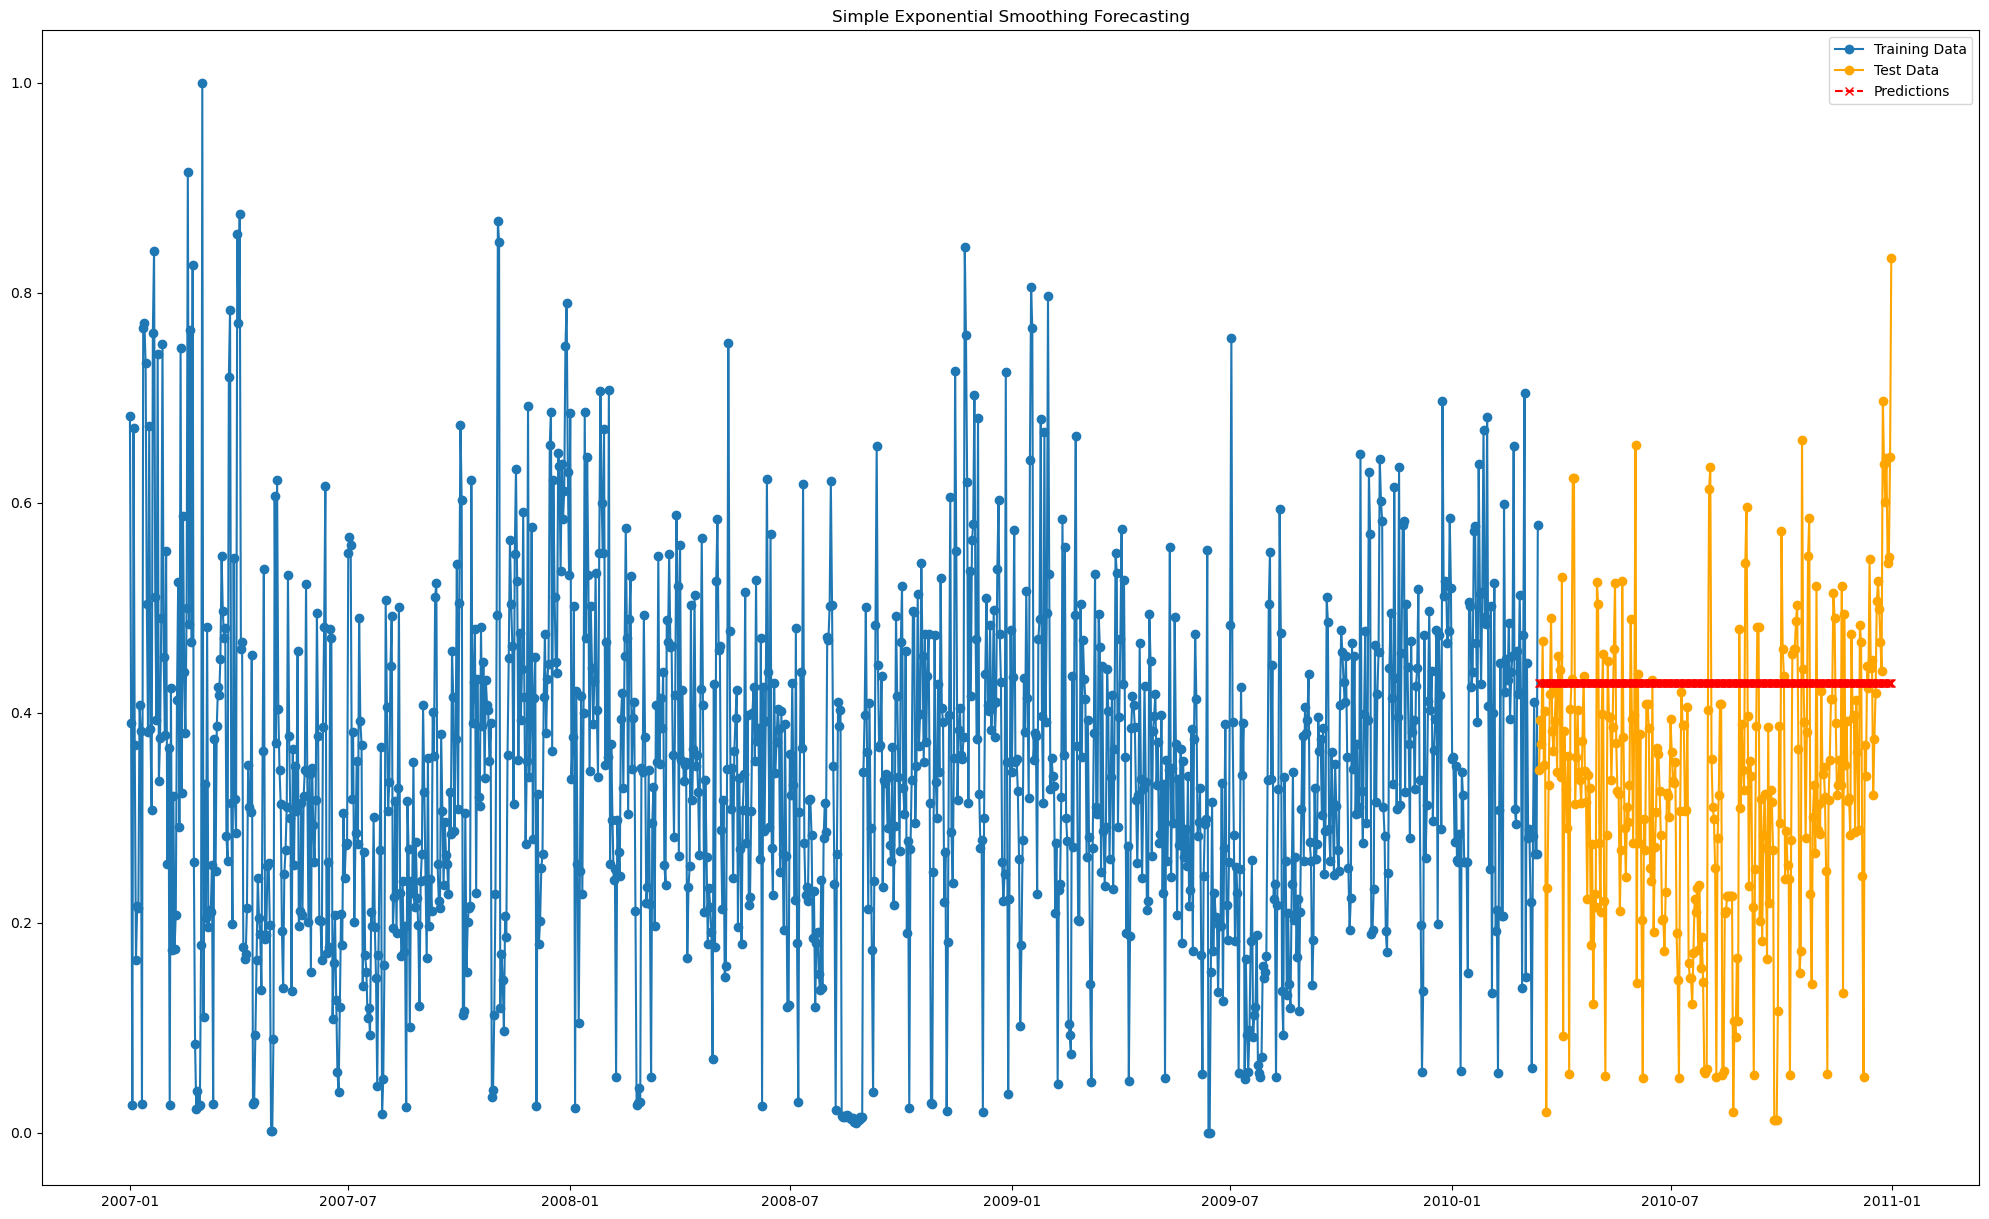

In [39]:
# Plot Original vs Forecasted data
plt.figure(figsize = (25, 15))
plt.plot(train_set, label = 'Training Data', marker = 'o')
plt.plot(test_set, label = 'Test Data', marker = 'o', color = 'orange')
plt.plot(exp_smoothing_forecast, label = 'Predictions', marker = 'x', linestyle = '--', color = 'red')
plt.legend()
plt.title('Simple Exponential Smoothing Forecasting')
plt.show();

In [40]:
# Calculate accuracy metrics
mse = mean_squared_error(test_set, exp_smoothing_forecast)
mae = mean_absolute_error(test_set, exp_smoothing_forecast)
rmse = np.sqrt(mse)

# Append the results to the lists
mse_metric = ('Simple Exponential Smoothing', str(mse))
mse_values.append(mse_metric)

mae_metric = ('Simple Exponential Smoothing', str(mae))
mae_values.append(mae_metric)

rmse_metric = ('Simple Exponential Smoothing', str(rmse))
rmse_values.append(rmse_metric)

In [41]:
# Print metrics
print("Simple Exponential Smoothing Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Simple Exponential Smoothing Model Metrics:
Mean Squared Error (MSE): 0.02991043207415959
Mean Absolute Error (MAE): 0.1385236665115005
Root Mean Squared Error (RMSE): 0.1729463271485104


##### b. Auto Arima

In [42]:
# Fit Auto ARIMA
auto_arima_model = auto_arima(train_set, seasonal = False, trace = False, suppress_warnings = True, stepwise = True)

# Summary of the model
print(auto_arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1168
Model:               SARIMAX(3, 0, 2)   Log Likelihood                 589.412
Date:                Tue, 10 Dec 2024   AIC                          -1164.824
Time:                        12:05:18   BIC                          -1129.383
Sample:                    01-01-2007   HQIC                         -1151.456
                         - 03-13-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0071      0.005      1.397      0.162      -0.003       0.017
ar.L1          0.4307      0.066      6.524      0.000       0.301       0.560
ar.L2          0.9253      0.071     13.059      0.0

In [43]:
# Forecasting using Auto Arima model with test set
auto_arima_forecast_temp = auto_arima_model.predict(n_periods = len(test_set))

# Convert forecast to pandas series for alignment with test set
auto_arima_forecast = pd.Series(auto_arima_forecast_temp, index = test_set.index)

print("Predictions:\n", auto_arima_forecast)

Predictions:
 Dates
2010-03-14    0.449562
2010-03-15    0.399774
2010-03-16    0.377327
2010-03-17    0.370281
2010-03-18    0.365215
                ...   
2010-12-27    0.346561
2010-12-28    0.346559
2010-12-29    0.346557
2010-12-30    0.346555
2010-12-31    0.346553
Length: 293, dtype: float64


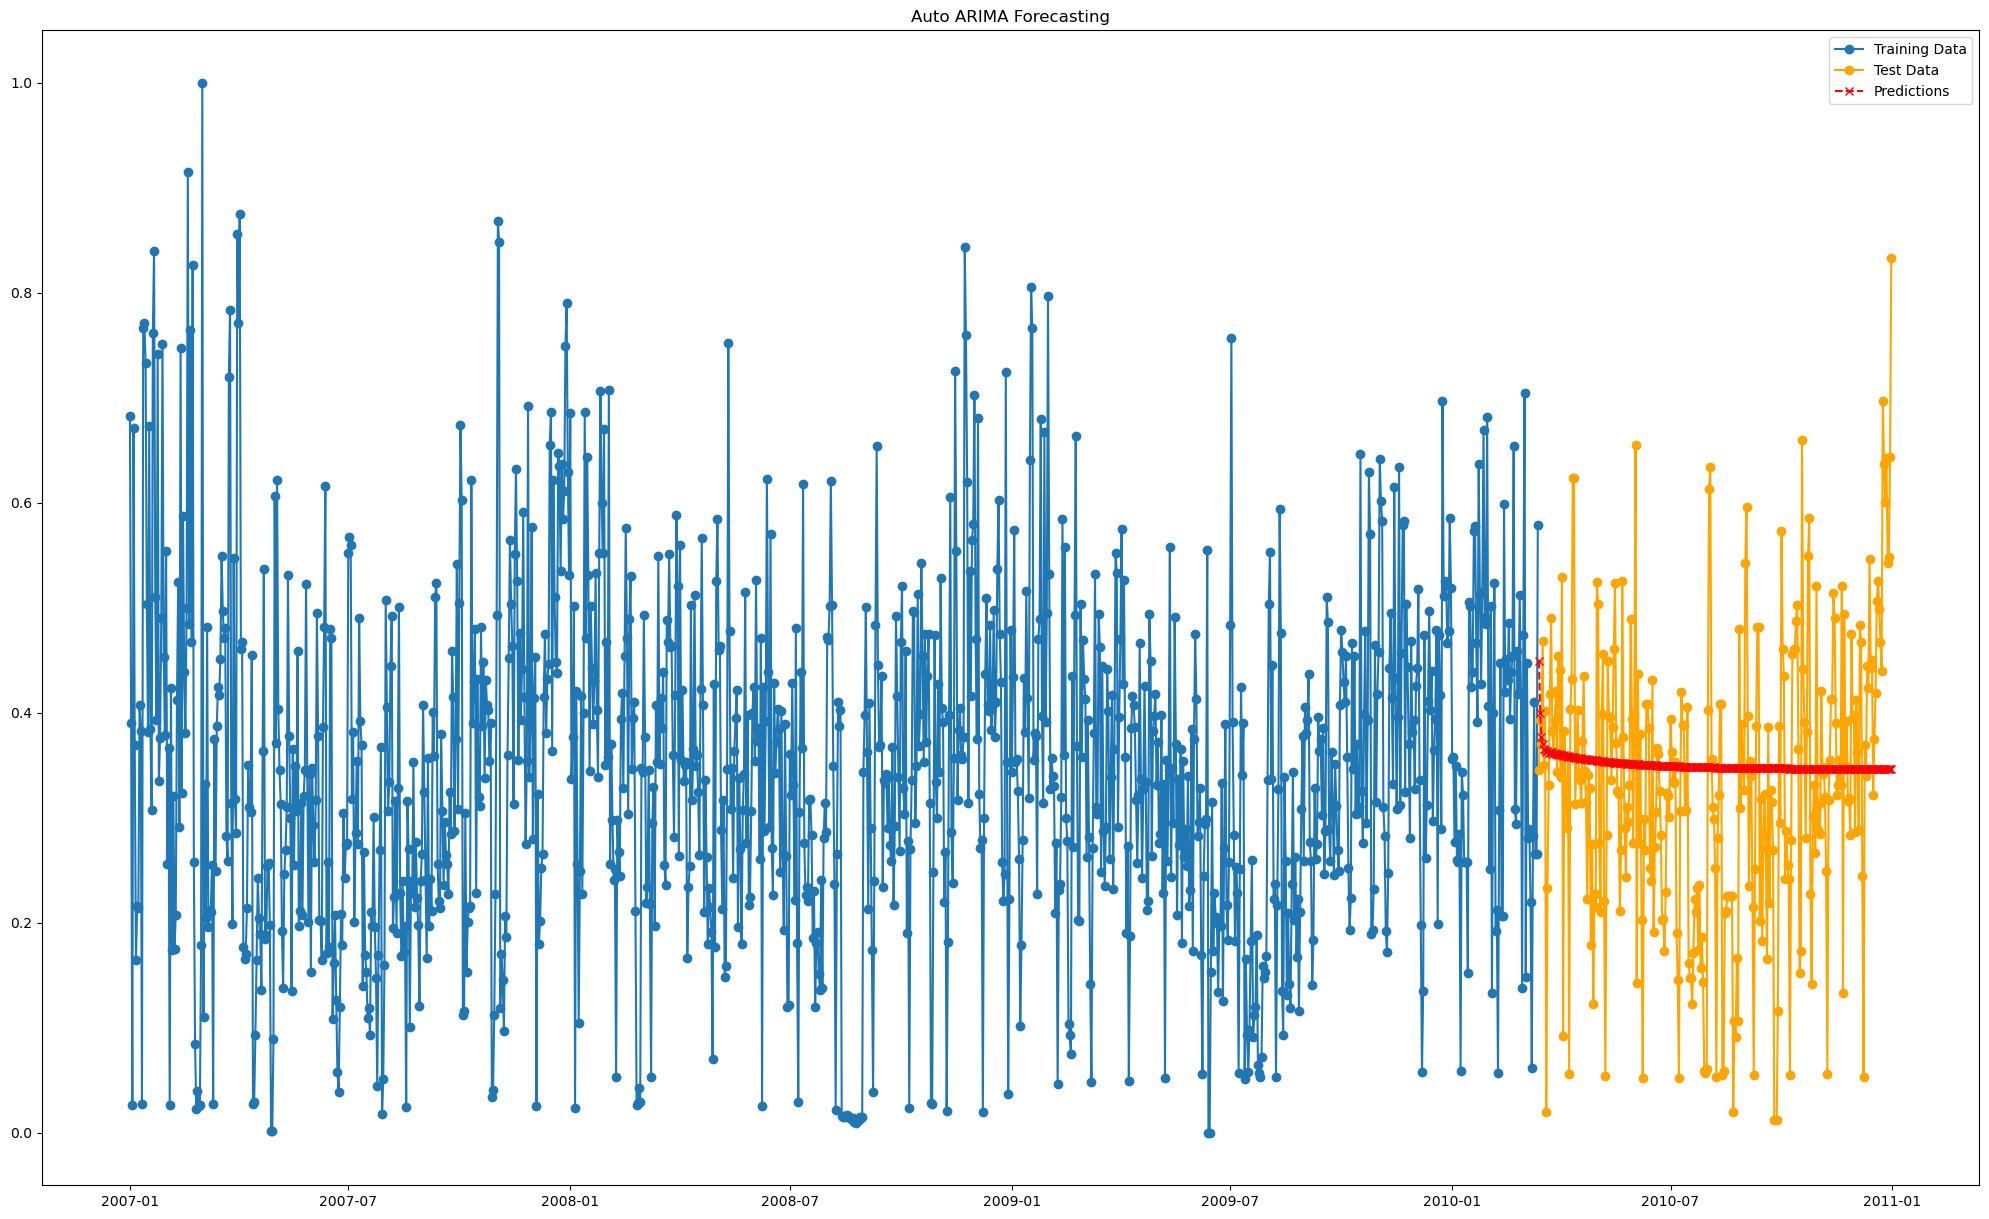

In [44]:
# Plot Original vs Forecasted data
plt.figure(figsize = (25, 15))
plt.plot(train_set, label = 'Training Data', marker = 'o')
plt.plot(test_set, label = 'Test Data', marker = 'o', color = 'orange')
plt.plot(auto_arima_forecast, label = 'Predictions', marker = 'x', linestyle = '--', color = 'red')
plt.legend()
plt.title('Auto ARIMA Forecasting')
plt.show()

In [45]:
# Calculate accuracy metrics
mse = mean_squared_error(test_set, auto_arima_forecast)
mae = mean_absolute_error(test_set, auto_arima_forecast)
rmse = np.sqrt(mse)

# Append the results to the lists
mse_metric = ('Auto Arima', str(mse))
mse_values.append(mse_metric)

mae_metric = ('Auto Arima', str(mae))
mae_values.append(mae_metric)

rmse_metric = ('Auto Arima', str(rmse))
rmse_values.append(rmse_metric)

In [46]:
# Print metrics
print("Auto Arima Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Auto Arima Model Metrics:
Mean Squared Error (MSE): 0.020609503665862457
Mean Absolute Error (MAE): 0.11078596034968216
Root Mean Squared Error (RMSE): 0.14356010471528105


##### c. CNN1D

In [47]:
# Function to Split DataSet
def transform_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
# Split dataset into training and testing
time_steps = 10

X_train, y_train = transform_dataset(train_set, train_set.Scaled_Consumption, time_steps)
X_test, y_test = transform_dataset(test_set, test_set.Scaled_Consumption, time_steps)

In [50]:
# Set number of features and steps
n_features = 1

# Build Model
model = keras.Sequential()
model.add(keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu', input_shape = (time_steps, n_features)))
model.add(keras.layers.MaxPooling1D(pool_size = 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(58, activation = 'relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [52]:
# Train Model
history = model.fit(
    X_train, y_train,
    epochs = 10,  # 200,
    batch_size = 16,
    validation_split = 0.1,
    verbose = 0,
    shuffle = False,
)

In [53]:
# Forecast New Values
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 2500x1500 with 0 Axes>

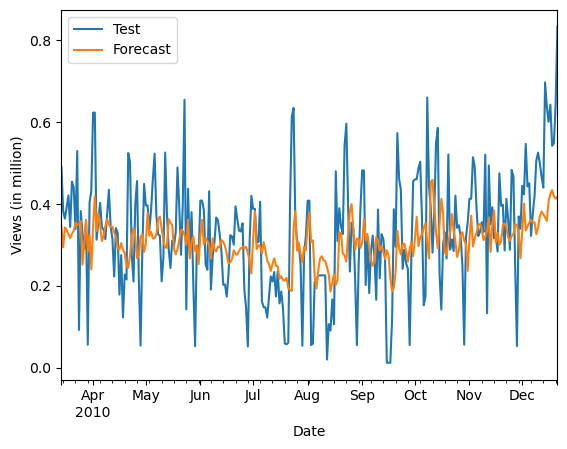

In [54]:
# Plot Results
plt.figure(figsize = (25, 15))
fig, ax = plt.subplots()
pd.DataFrame({'Date': test_set.index[:y_test.shape[0]], 'Views': y_test}).plot('Date', ax = ax)
pd.DataFrame({'Date': test_set.index[:y_pred.shape[0]], 'Views': y_pred.flatten()}).plot('Date', ax = ax)
plt.legend(['Test', 'Forecast'], loc = 'upper left')
plt.ylabel('Views (in million)')
plt.show();

In [55]:
# Calculate accuracy metrics
mse = mean_squared_error(test_set, auto_arima_forecast)
mae = mean_absolute_error(test_set, auto_arima_forecast)
rmse = np.sqrt(mse)

# Append the results to the lists
mse_metric = ('CNN1D', str(mse))
mse_values.append(mse_metric)

mae_metric = ('CNN1D', str(mae))
mae_values.append(mae_metric)

rmse_metric = ('CNN1D', str(rmse))
rmse_values.append(rmse_metric)

In [56]:
# Print metrics
print("CNN1D Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

CNN1D Model Metrics:
Mean Squared Error (MSE): 0.020609503665862457
Mean Absolute Error (MAE): 0.11078596034968216
Root Mean Squared Error (RMSE): 0.14356010471528105


#### 7. Compare Models & Select Best

In [62]:
# Create a table for MSE
from rich.table import Table

table = Table(title = "MSE Models Comparison", show_lines = True)

# Add columns to the table
table.add_column("Model", justify = "center", style = "green", no_wrap = False)
table.add_column("MSE", style = "purple")

# Example data for mse_values
mse_values = [("Exponential Smoothing", "0.0299"), ("Auto Arima", "0.0206"), ("CNN1D", "0.0206")]

# Add rows to the table from the mse_values list
for row in mse_values:
    table.add_row(row[0], row[1])  # Unpack the tuple and add each value as a string

# Show formatted table (only works in a terminal or environment that supports rich rendering)
from rich.console import Console
console = Console()
console.print(table)

      MSE Models Comparison       
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃         Model         ┃ MSE    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Exponential Smoothing │ 0.0299 │
├───────────────────────┼────────┤
│      Auto Arima       │ 0.0206 │
├───────────────────────┼────────┤
│         CNN1D         │ 0.0206 │
└───────────────────────┴────────┘

In [64]:
# Create a table for MAE
from rich.table import Table

table = Table(title = "MAE Models Comparison", show_lines = True)

# Add columns to the table
table.add_column("Model", justify = "center", style = "green", no_wrap = False)
table.add_column("MAE", style = "purple")

# Example data for mae_values
mae_values = [("Exponential Smoothing", "0.1385"), ("Auto Arima", "0.1108"), ("CNN1D", "0.1108")]

# Add rows to the table from the mae_values list
for row in mae_values:
    table.add_row(row[0], row[1])  # Unpack the tuple and add each value as a string

# Show formatted table (only works in a terminal or environment that supports rich rendering)
from rich.console import Console
console = Console()
console.print(table)

      MAE Models Comparison       
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃         Model         ┃ MAE    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Exponential Smoothing │ 0.1385 │
├───────────────────────┼────────┤
│      Auto Arima       │ 0.1108 │
├───────────────────────┼────────┤
│         CNN1D         │ 0.1108 │
└───────────────────────┴────────┘

In [66]:
# Create a table for RMSE
from rich.table import Table

table = Table(title = "RMSE Models Comparison", show_lines = True)

# Add columns to the table
table.add_column("Model", justify = "center", style = "green", no_wrap = False)
table.add_column("RMSE", style = "purple")

# Example data for rmse_values
rmse_values = [("Exponential Smoothing", "0.1729"), ("Auto Arima", "0.1436"), ("CNN1D", "0.1436")]

# Add rows to the table from the rmse_values list
for row in rmse_values:
    table.add_row(row[0], row[1])  # Unpack the tuple and add each value as a string

# Show formatted table (only works in a terminal or environment that supports rich rendering)
from rich.console import Console
console = Console()
console.print(table)

      RMSE Models Comparison      
┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃         Model         ┃ RMSE   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Exponential Smoothing │ 0.1729 │
├───────────────────────┼────────┤
│      Auto Arima       │ 0.1436 │
├───────────────────────┼────────┤
│         CNN1D         │ 0.1436 │
└───────────────────────┴────────┘

# Chosen Model

##### As a group, we decided that Auto Arima will be the best model to use for future energy consumption forecasting. Both Auto Arima and CNN1D outperform Exponential Smoothing in all accuracy metrics. For this reason, we eliminated Exponential Smoothing and limited our consideration to Auto Arima vs. CNN1D. In our research, we found that CNN1D is typically more difficult, costly, and time consuming, but can be helpful in handling very complex patterns. Conversely, Auto Arima models are typically more straightforward and better in situations with simple patterns that do not require as much computational power. For this reason, after finding that the seasonal patterns were not all that complex, we settled on a decision that Auto Arima would be the best model for our use. When we consider that the accuracy metrics are identical, we feel it is a no-brainer to opt for the more cost-efficient model as we will not be sacrificing any accuracy.